# 16장 이미지 인식의 꽃, 컨볼루션 뉴럴 네트워크(CNN)

### 3. 컨볼루션 뉴럴 네트워크(CNN)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = '../data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="../data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))



Epoch 00001: val_loss improved from inf to 0.08194, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00002: val_loss improved from 0.08194 to 0.05932, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00003: val_loss improved from 0.05932 to 0.04733, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00004: val_loss improved from 0.04733 to 0.04511, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00005: val_loss improved from 0.04511 to 0.04102, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00006: val_loss improved from 0.04102 to 0.04052, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00007: val_loss improved from 0.04052 to 0.03845, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00008: val_loss improved from 0.03845 to 0.03573, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00009: val_loss did not improve from 0.03573

Epoch 00010: val_loss did not improve from 0.03573

Epoch 00011: val_loss did not improve from 0.03573

Epoch 00012: val_loss did not i

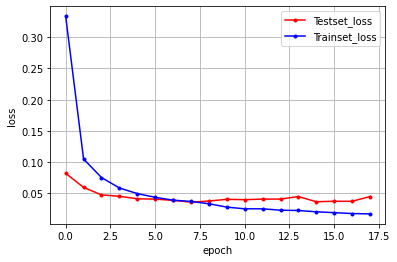

In [2]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()